<a href="https://colab.research.google.com/github/AnasHattay/E.Coli-DNA-Sequences-Classification/blob/main/E.coli-DNA-Sequences_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**DNA Sequence Classification using Machine Learning**

*Introduction*

In genetics, a promoter is a region of DNA where transcription of a gene is initiated. Promoters are a vital component of expression vectors because they control the binding of RNA polymerase to DNA. RNA polymerase transcribes DNA to mRNA which is ultimately translated into a functional protein. Thus the promoter region controls when and where in the organism your gene of interest is expressed.

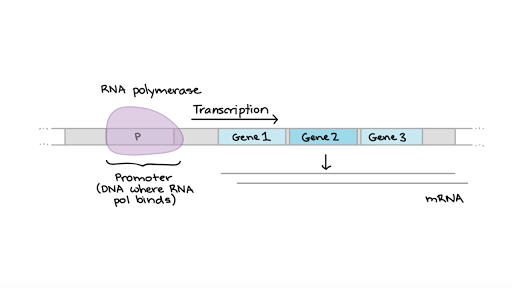

**The Domain Theory (for recognizing promoters):**


   Promoters have a region where a protein (RNA polymerase) must make contact
   and the helical DNA sequence must have a valid conformation so that
   the two pieces of the contact region spatially align.


   There are two regions "upstream" from the beginning of the gene
   at which the RNA polymerase makes contact.

    contact  :- minus_35, minus_10.

  


  

An example of promoter sequences:

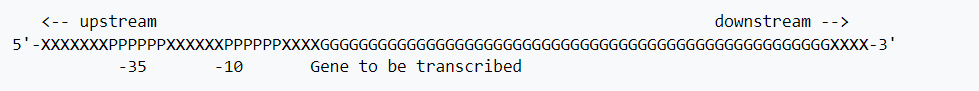

 *The following rules describe the compositions of possible contact regions:*


**Minus_35**

*   minus_35 :- p-37=c, p-36=t, p-35=t, p-34=g, p-33=a, p-32=c.

*   minus_35 :- p-37=c, p-36=t, p-35=t, p-34=g, p-33=a, p-32=c.

*   minus_35 :-         p-36=t, p-35=t, p-34=g, p-33=a, p-32=c, p-31=a.

*   minus_35 :-         p-36=t, p-35=t, p-34=g, p-33=a, p-32=c.

**Minus_10**

*  minus_10 :- p-14 t, p-13 a, p-12=t, p-11=a, p-10=a, p-9=t. 

*  minus_10 :-         p-13 t, p-12=a,         p-10=a,        p-8=t.

*  minus_10 :-         p-13 t, p-12=a, p-11=t, p-10=a, p-9=a, p-8=t.

*  minus_10 :-                 p-12=t, p-11=a,                       p-7=t. 

This project aims to classify E.coli bacteria DNA sequences into two classes : Promoters/no promoters .
After Visualizing and transforming the dataset provided from the Department of Molecular Biology and Biochemistry , we will try some classification algorithms with the best hyperparameters obtained by the gridsearch method.\

## Importing libraries

In [ ]:
import sys 
import numpy
import sklearn 
import pandas as pd
import numpy as np

## Exploring the Dataset

In [ ]:
# Import the dataset

url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/molecular-biology/promoter-gene-sequences/promoters.data'
names = ['Class', 'id', 'Sequence']
data = pd.read_csv(url, names = names)

In [ ]:
data.head()

In [ ]:
print(data.iloc[0])


In [ ]:
classes = data.loc[:, 'Class']
print(classes[:5])

##Preprocessing the dataset


In [ ]:
# generate list of DNA sequences
sequences = list(data.loc[:, 'Sequence'])
dataset = {}

# loop through sequences and split into individual nucleotides
for i, seq in enumerate(sequences):
    
    # split into nucleotides, remove tab characters
    nucleotides = list(seq)
    nucleotides = [x for x in nucleotides if x != '\t']
    
    # append class assignment
    nucleotides.append(classes[i])
    
    # add to dataset
    dataset[i] = nucleotides
    
print(dataset[0])

['t', 'a', 'c', 't', 'a', 'g', 'c', 'a', 'a', 't', 'a', 'c', 'g', 'c', 't', 't', 'g', 'c', 'g', 't', 't', 'c', 'g', 'g', 't', 'g', 'g', 't', 't', 'a', 'a', 'g', 't', 'a', 't', 'g', 't', 'a', 't', 'a', 'a', 't', 'g', 'c', 'g', 'c', 'g', 'g', 'g', 'c', 't', 't', 'g', 't', 'c', 'g', 't', '+']


In [ ]:
type(dataset)

dict

In [ ]:
# turn dataset into pandas DataFrame
dframe = pd.DataFrame(dataset)
print(dframe)

In [ ]:
df=dframe.transpose()

In [ ]:
df.rename(columns={57:'Class'},inplace=True)

In [ ]:
df.describe()


In [ ]:
# Record value counts for each sequence

Output=[]
for x in df.columns :
    Output.append(df[x].value_counts())

In [ ]:
info=pd.DataFrame(Output)

In [ ]:
info.transpose()

In [ ]:
df

In [ ]:
import matplotlib.pyplot as plt

from scipy import stats
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
dfNumeric=pd.get_dummies(df)

In [ ]:
dfNumeric

In [ ]:
df.tail()


In [ ]:
#  Many machine learning algorithms cannot operate on label data directly. They require all input variables and output variables to be numeric.

df = dfNumeric.drop(columns=['Class_-'])

df.rename(columns = {'Class_+': 'Class'}, inplace = True)
print(df.iloc[:5])

In [ ]:
# Use the model_selection module to separate training and testing datasets
from sklearn import model_selection

# Create X and Y datasets for training
X = np.array(df.drop(['Class'], axis=1))
y = np.array(df['Class'])

# define seed for reproducibility
seed = 1

# split data into training and testing datasets
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.25,random_state=seed)

## Training and Evaluating

In [ ]:


from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier,ExtraTreesClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

#define scoring method
scoring ='accuracy'
#define the model to train
names = ["Nearest Neighbors", "Gaussian Process","Decision Tree","Random Forest",
         "Neural Net", "AdaBoost","ExtraTreesClassifier","Naive Bayes","SGDClassifier","SVM Linear","SVM RBF","SVM Sigmoid"]
classifiers =[
    KNeighborsClassifier(n_neighbors=3),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10,max_features=1),
    MLPClassifier(alpha=1),
    AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=0.2,
                   n_estimators=230, random_state=1),
    ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0,
                     class_weight='balanced_subsample', criterion='gini',
                     max_depth=4, max_features='sqrt', max_leaf_nodes=None,
                     max_samples=None, min_impurity_decrease=0.0005,
                     min_impurity_split=None, min_samples_leaf=3,
                     min_samples_split=5, min_weight_fraction_leaf=0.0,
                     n_estimators=260, n_jobs=-1, oob_score=False,
                     random_state=123, verbose=0, warm_start=False),
    GaussianNB(),
    SGDClassifier(alpha=0.05, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.001,
              fit_intercept=False, l1_ratio=0.8900000001,
              learning_rate='optimal', loss='hinge', max_iter=1000,
              n_iter_no_change=5, n_jobs=-1, penalty='l2', power_t=0.5,
              random_state=123, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False),
    SVC(kernel='linear'),
    SVC(kernel='rbf'),
    SVC(kernel='sigmoid')
]
models =zip(names,classifiers)
# evaluate each model in turn
results = []
names=[]
for name,model in models:
    kfold = model_selection.KFold(n_splits = 10, shuffle=True)
    cv_results = model_selection.cross_val_score(model, X_train,y_train,cv=kfold,scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg= "%s: %f (%f)" %(name, cv_results.mean(), cv_results.std())
    
    print(msg)
    model.fit(X_train,y_train)
    predictions= model.predict(X_test)
    print(name)
    
    print(classification_report(y_test,predictions))

Finally, it is clear that the SVM Linear algorithm has the best performance (F1-Score).